In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
dataset = 'dataset_7s'

In [3]:
labels_df_1 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_100x25x150_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_2 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_100x25_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_3 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_50x25_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_4 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_50x20_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_5 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_50x15_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_6 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_50x12P5_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))
labels_df_7 = pd.read_parquet(glob.glob('/data/dajiang/smartPixels/{}/{}_50x10_parquets/unflipped/labels*.parquet'.format(dataset,dataset)))

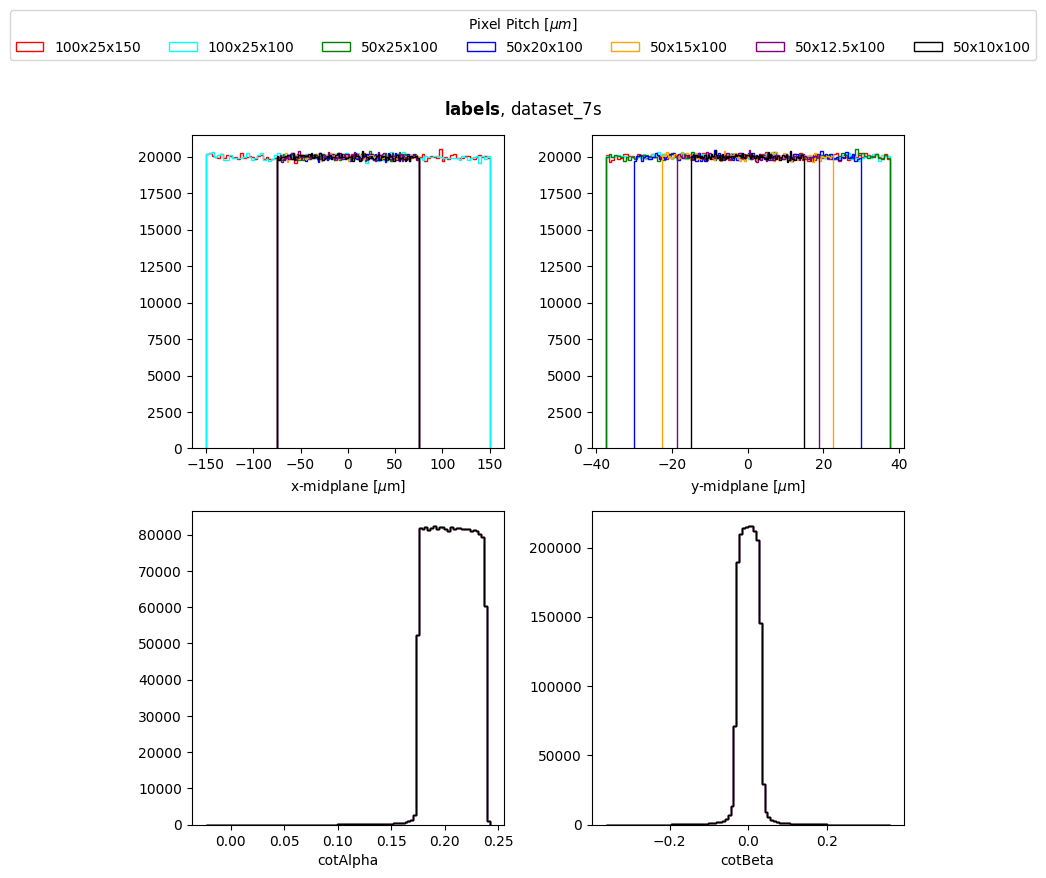

In [4]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0,0].hist(labels_df_1['x-midplane'],bins=100,histtype='step',label='100x25x150', color='red')
ax[0,0].hist(labels_df_2['x-midplane'],bins=100,histtype='step',label='100x25x100', color='cyan')
ax[0,0].hist(labels_df_3['x-midplane'],bins=100,histtype='step',label='50x25x100', color='green')
ax[0,0].hist(labels_df_4['x-midplane'],bins=100,histtype='step',label='50x20x100', color='blue')
ax[0,0].hist(labels_df_5['x-midplane'],bins=100,histtype='step',label='50x15x100', color='orange')
ax[0,0].hist(labels_df_6['x-midplane'],bins=100,histtype='step',label='50x12.5x100', color='purple')
ax[0,0].hist(labels_df_7['x-midplane'],bins=100,histtype='step',label='50x10x100', color='black')
ax[0,0].set_xlabel('x-midplane [$\mu$m]')

ax[0,1].hist(labels_df_1['y-midplane'],bins=100,histtype='step', color='red')
ax[0,1].hist(labels_df_2['y-midplane'],bins=100,histtype='step', color='cyan')
ax[0,1].hist(labels_df_3['y-midplane'],bins=100,histtype='step', color='green')
ax[0,1].hist(labels_df_4['y-midplane'],bins=100,histtype='step', color='blue')
ax[0,1].hist(labels_df_5['y-midplane'],bins=100,histtype='step', color='orange')
ax[0,1].hist(labels_df_6['y-midplane'],bins=100,histtype='step', color='purple')
ax[0,1].hist(labels_df_7['y-midplane'],bins=100,histtype='step', color='black')
ax[0,1].set_xlabel('y-midplane [$\mu$m]')

ax[1,0].hist(labels_df_1['cotAlpha'],bins=100,histtype='step', color='red')
ax[1,0].hist(labels_df_2['cotAlpha'],bins=100,histtype='step', color='cyan')
ax[1,0].hist(labels_df_3['cotAlpha'],bins=100,histtype='step', color='green')
ax[1,0].hist(labels_df_4['cotAlpha'],bins=100,histtype='step', color='blue')
ax[1,0].hist(labels_df_5['cotAlpha'],bins=100,histtype='step', color='orange')
ax[1,0].hist(labels_df_6['cotAlpha'],bins=100,histtype='step', color='purple')
ax[1,0].hist(labels_df_7['cotAlpha'],bins=100,histtype='step', color='black')
ax[1,0].set_xlabel('cotAlpha')

ax[1,1].hist(labels_df_1['cotBeta'],bins=100,histtype='step', color='red')
ax[1,1].hist(labels_df_2['cotBeta'],bins=100,histtype='step', color='cyan')
ax[1,1].hist(labels_df_3['cotBeta'],bins=100,histtype='step', color='green')
ax[1,1].hist(labels_df_4['cotBeta'],bins=100,histtype='step', color='blue')
ax[1,1].hist(labels_df_5['cotBeta'],bins=100,histtype='step', color='orange')
ax[1,1].hist(labels_df_6['cotBeta'],bins=100,histtype='step', color='purple')
ax[1,1].hist(labels_df_7['cotBeta'],bins=100,histtype='step', color='black')
ax[1,1].set_xlabel('cotBeta')

fig.suptitle(r'$\mathbf{{labels}}$, {}'.format(dataset))
fig.legend(title='Pixel Pitch [$\mu m$]', loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.1))
fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_labels.png'.format(dataset,dataset),  bbox_inches='tight', dpi=300)
fig.show()

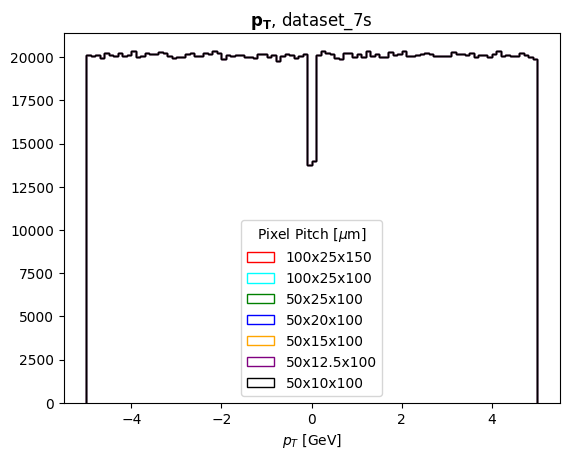

In [5]:
fig, ax = plt.subplots()

ax.hist(labels_df_1['pt'],bins=100,histtype='step',label='100x25x150', color='red')
ax.hist(labels_df_2['pt'],bins=100,histtype='step',label='100x25x100', color='cyan')
ax.hist(labels_df_3['pt'],bins=100,histtype='step',label='50x25x100', color='green')
ax.hist(labels_df_4['pt'],bins=100,histtype='step',label='50x20x100', color='blue')
ax.hist(labels_df_5['pt'],bins=100,histtype='step',label='50x15x100', color='orange')
ax.hist(labels_df_6['pt'],bins=100,histtype='step',label='50x12.5x100', color='purple')
ax.hist(labels_df_7['pt'],bins=100,histtype='step',label='50x10x100', color='black')
ax.set_title(r'$\mathbf{{p_T}}$, {}'.format(dataset))
ax.set_xlabel('$p_T$ [GeV]')
ax.legend(title='Pixel Pitch [$\mu$m]')
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_pt.png'.format(dataset,dataset), dpi=300)
fig.show()

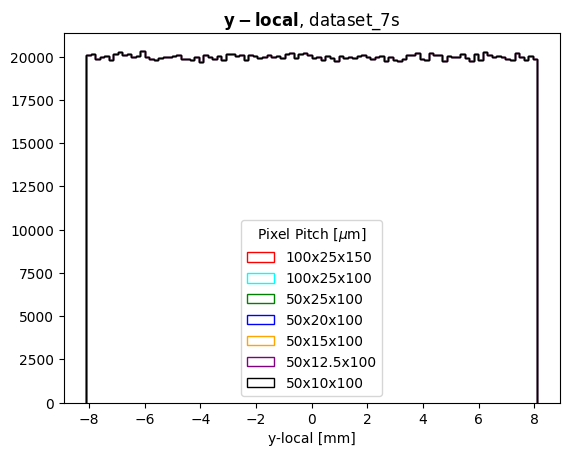

In [6]:
fig, ax = plt.subplots()

ax.hist(labels_df_1['y-local'],bins=100,histtype='step',label='100x25x150', color='red')
ax.hist(labels_df_2['y-local'],bins=100,histtype='step',label='100x25x100', color='cyan')
ax.hist(labels_df_3['y-local'],bins=100,histtype='step',label='50x25x100', color='green')
ax.hist(labels_df_4['y-local'],bins=100,histtype='step',label='50x20x100', color='blue')
ax.hist(labels_df_5['y-local'],bins=100,histtype='step',label='50x15x100', color='orange')
ax.hist(labels_df_6['y-local'],bins=100,histtype='step',label='50x12.5x100', color='purple')
ax.hist(labels_df_7['y-local'],bins=100,histtype='step',label='50x10x100', color='black')
ax.set_title(r'$\mathbf{{y-local}}$, {}'.format(dataset))
ax.set_xlabel('y-local [mm]')
ax.legend(title='Pixel Pitch [$\mu$m]')
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_y_local.png'.format(dataset,dataset), dpi=300)
fig.show()

In [7]:
f = open('/data/dajiang/smartPixels/{}/{}_event_stats.txt'.format(dataset,dataset), 'w')
f.write('----{}----\n'.format(dataset))
f.write('100x25x150: {} events\n'.format(len(labels_df_1)))
f.write('100x25: {} events\n'.format(len(labels_df_2)))
f.write('50x25: {} events\n'.format(len(labels_df_3)))
f.write('50x20: {} events\n'.format(len(labels_df_4)))
f.write('50x15: {} events\n'.format(len(labels_df_5)))
f.write('50x12P5: {} events\n'.format(len(labels_df_6)))
f.write('50x10: {} events\n'.format(len(labels_df_7)))
f.close()